### Question 3 Day2


In [ ]:
Suppose we have a data set with five predictors, X1 = GPA, X2 =
IQ, X3 = Level (1 for College and 0 for High School), X4 = Interaction
between GPA and IQ, and X5 = Interaction between GPA and
Level. The response is starting salary after graduation (in thousands
of dollars). Suppose we use least squares to fit the model, and get
ˆ β0 = 50, ˆ β1 = 20, ˆ β2 = 0.07, ˆ β3 = 35, ˆ β4 = 0.01, ˆ β5 = −10.
(a) Which answer is correct, and why?
i. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates.
ii. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates.
iii. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates provided that the
GPA is high enough.
iv. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates provided that
the GPA is high enough.
(b) Predict the salary of a college graduate with IQ of 110 and a
GPA of 4.0.
(c) True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.

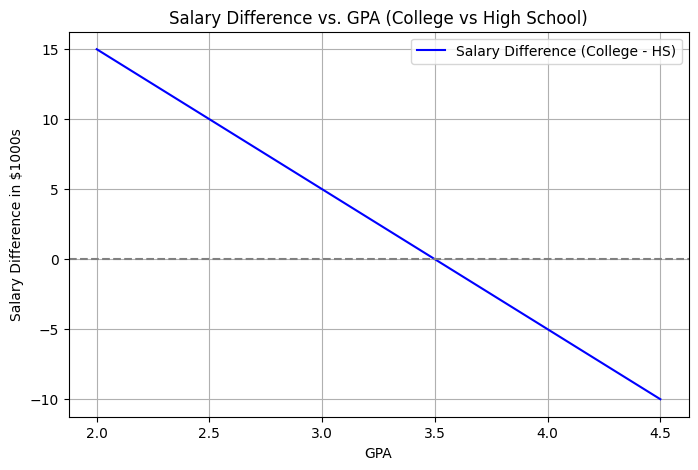


(b) Predicted Salary:
A college graduate with GPA=4.0 and IQ=110 is predicted to earn $137,100.00

(c) Interaction Effect:
The GPA*IQ interaction contributes: 4.40 thousand dollars to the salary.
Interpretation:
→ The GPA*IQ interaction has a notable effect on the salary.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients
beta_0 = 50     # Intercept
beta_1 = 20     # GPA
beta_2 = 0.07   # IQ
beta_3 = 35     # Level (College = 1, High School = 0)
beta_4 = 0.01   # GPA * IQ
beta_5 = -10    # GPA * Level

# --- (a) Salary difference between College and High School ---
def salary_difference_by_gpa(gpa_values):
    """
    Computes the salary difference between college and high school graduates
    for a range of GPA values, assuming fixed IQ.
    """
    return beta_3 + beta_5 * gpa_values

# Plotting salary difference as a function of GPA
gpa_range = np.linspace(2.0, 4.5, 100)
salary_differences = salary_difference_by_gpa(gpa_range)

plt.figure(figsize=(8, 5))
plt.plot(gpa_range, salary_differences, color='blue', label="Salary Difference (College - HS)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Salary Difference vs. GPA (College vs High School)")
plt.xlabel("GPA")
plt.ylabel("Salary Difference in $1000s")
plt.legend()
plt.grid(True)
plt.show()

# --- (b) Predict salary for a college graduate with GPA=4.0, IQ=110 ---
GPA = 4.0
IQ = 110
Level = 1  # College

# Interaction terms
GPA_IQ = GPA * IQ
GPA_Level = GPA * Level

# Predict salary
predicted_salary = (
    beta_0 +
    beta_1 * GPA +
    beta_2 * IQ +
    beta_3 * Level +
    beta_4 * GPA_IQ +
    beta_5 * GPA_Level
)

print("\n(b) Predicted Salary:")
print(f"A college graduate with GPA={GPA} and IQ={IQ} is predicted to earn ${predicted_salary * 1000:,.2f}")

# --- (c) Analyze interaction between GPA and IQ ---
interaction_effect = beta_4 * GPA_IQ

print("\n(c) Interaction Effect:")
print(f"The GPA*IQ interaction contributes: {interaction_effect:.2f} thousand dollars to the salary.")
print("Interpretation:")
if abs(beta_4) < 0.01:
    print("→ The coefficient for GPA*IQ is small, but since GPA and IQ are not small, the combined effect is still meaningful.")
else:
    print("→ The GPA*IQ interaction has a notable effect on the salary.")


#  question 8 day2 

In [ ]:
Question 8 Explanation (Detailed)
You are working with the Auto dataset, and your goal is to analyze the relationship between horsepower (predictor) and 
 mpg (miles per gallon, response) using simple linear regression. Let's break down each part.

(a) Use sm.OLS() for Simple Linear Regression
What is simple linear regression?
It models the linear relationship between a single predictor variable 


In [ ]:
8. This question involves the use of simple linear regression on the Auto
data set.
(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?
iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?
(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.
(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        19:09:07   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

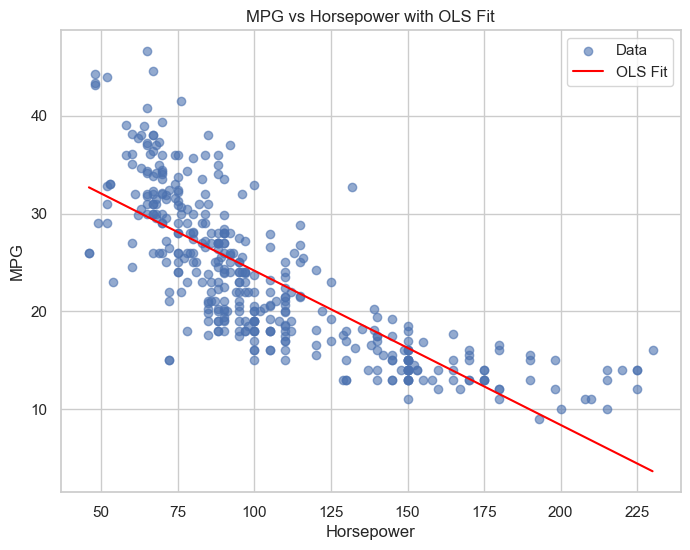

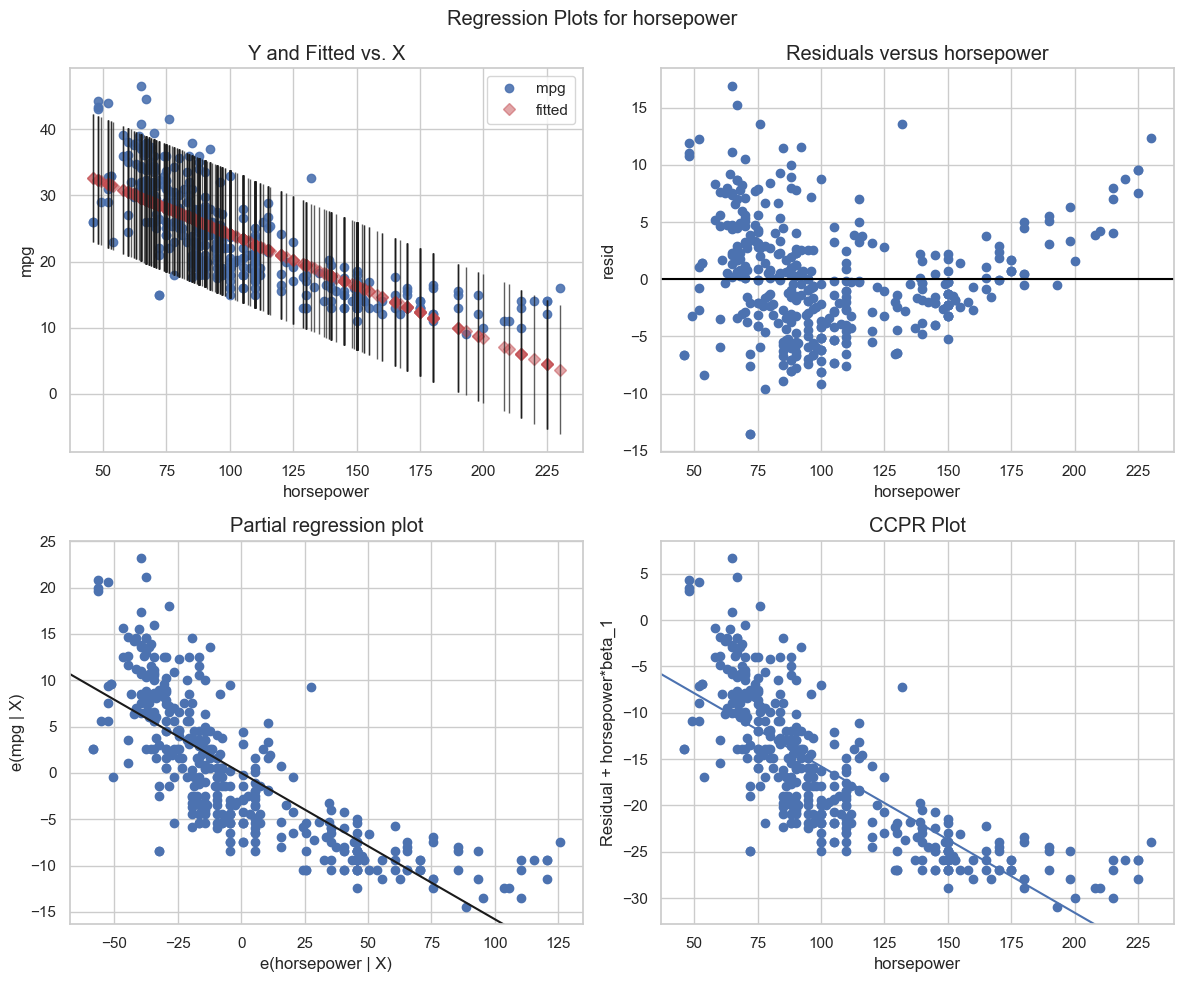

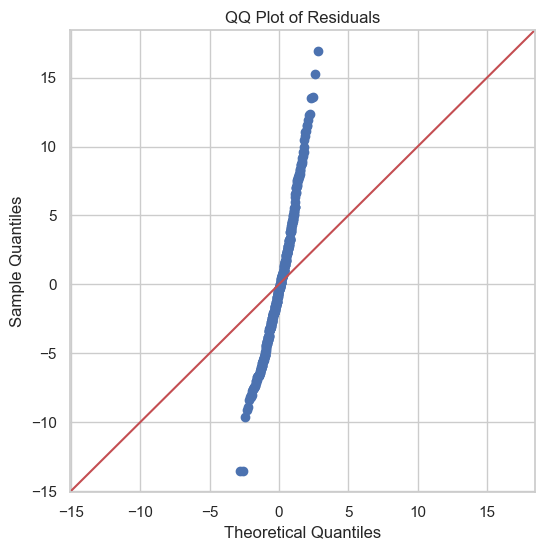

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------
# Load Auto dataset
# -------------------
# Replace with your path to Auto.csv
df = pd.read_csv('Auto.csv', na_values='?')
df = df.dropna(subset=['mpg', 'horsepower'])

X = df['horsepower']
y = df['mpg']
X_const = sm.add_constant(X)

# -------------------
# (a) Fit OLS model
# -------------------
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Predictions at horsepower = 98
h0 = 98
# Create prediction DataFrame with same columns and order as X_const
x0 = pd.DataFrame({'const': [1], 'horsepower': [h0]})

pred = model.get_prediction(x0)
print("\nPredicted mpg at 98 hp:")
print(pred.summary_frame(alpha=0.05)[['mean', 'mean_ci_lower', 'mean_ci_upper',
                                       'obs_ci_lower', 'obs_ci_upper']])

# --------------------
# (b) Scatter + fit line
# --------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(X.sort_values(), model.predict(sm.add_constant(X.sort_values())),
         color='red', label='OLS Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower with OLS Fit')
plt.legend()
plt.show()

# -----------------------
# (c) Diagnostic Plots
# -----------------------
fig = plt.figure(figsize=(12, 10))
_ = sm.graphics.plot_regress_exog(model, 'horsepower', fig=fig)
fig.tight_layout()
plt.show()

fig2 = plt.figure(figsize=(6,6))
_ = sm.graphics.qqplot(model.resid, line='45', ax=fig2.add_subplot(111))
plt.title('QQ Plot of Residuals')
plt.show()


# Question 13 day 2

In [ ]:
13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.
(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.
(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.
(c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + ϵ. (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?
(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.
(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do ˆ β0 and ˆ β1 compare to β0 and
β1?
(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() method of the axes to create an appropriate
legend.
(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.
(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
ϵ in (b). Describe your results.
(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term ϵ in (b). Describe your results.
(j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

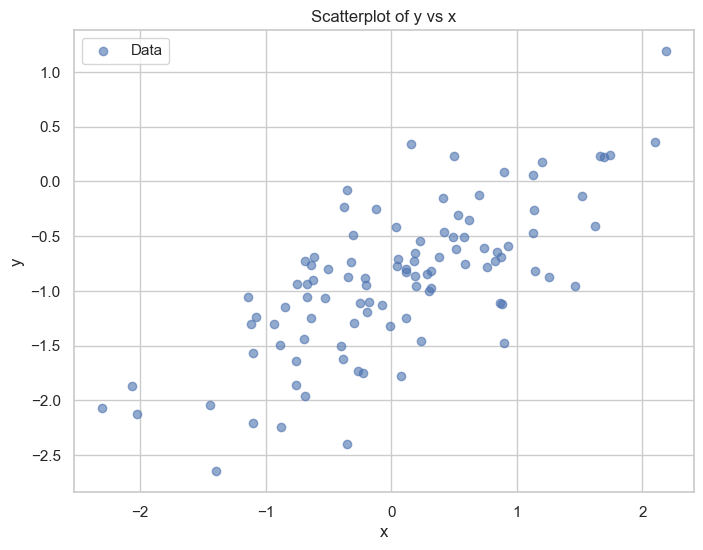

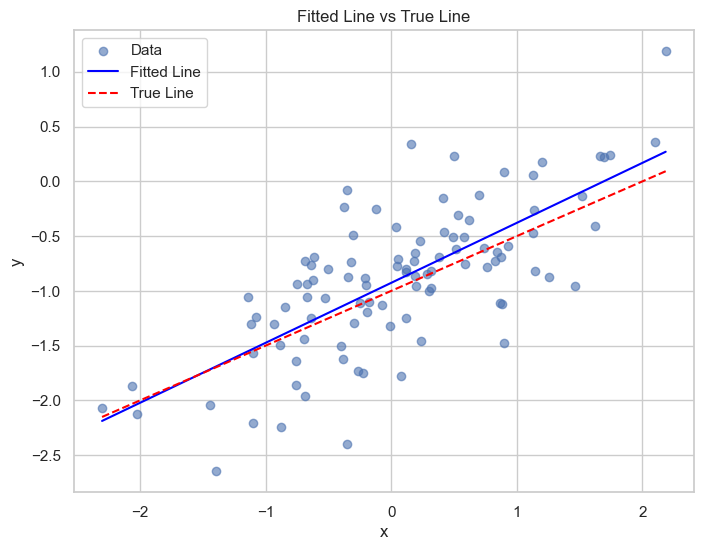

{'length_y': 100,
 'true_beta_0': -1,
 'true_beta_1': 0.5,
 'fitted_beta_0': -0.9264932351508991,
 'fitted_beta_1': 0.5477135668255857,
 'poly_model_pvalues': Intercept    2.915250e-29
 x            4.299969e-17
 x2           8.565000e-01
 dtype: float64}

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set seed for reproducibility
np.random.seed(1)

# (a) Generate x ~ N(0, 1)
x = np.random.normal(loc=0, scale=1, size=100)

# (b) Generate eps ~ N(0, 0.25)
eps = np.random.normal(loc=0, scale=np.sqrt(0.25), size=100)

# (c) Generate y = -1 + 0.5 * x + eps
y = -1 + 0.5 * x + eps

# Model parameters
beta_0 = -1
beta_1 = 0.5
len_y = len(y)

# (d) Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y vs x')
plt.grid(True)
plt.legend()
plt.show()

# (e) Fit least squares linear model
X_const = sm.add_constant(x)
model = sm.OLS(y, X_const).fit()

# (f) Plot fitted line and true line
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data')
x_vals = np.linspace(min(x), max(x), 100)
# Fitted line
plt.plot(x_vals, model.params[0] + model.params[1] * x_vals, color='blue', label='Fitted Line')
# True regression line
plt.plot(x_vals, beta_0 + beta_1 * x_vals, color='red', linestyle='--', label='True Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Line vs True Line')
plt.legend()
plt.grid(True)
plt.show()

# (g) Fit polynomial regression: y ~ x + x^2
df_poly = pd.DataFrame({'x': x, 'x2': x**2, 'y': y})
poly_model = smf.ols('y ~ x + x2', data=df_poly).fit()

# Collect results
{
    "length_y": len_y,
    "true_beta_0": beta_0,
    "true_beta_1": beta_1,
    "fitted_beta_0": model.params[0],
    "fitted_beta_1": model.params[1],
    "poly_model_pvalues": poly_model.pvalues
}


# QUESTION 3 DAY THREE

In [ ]:
This problem relates to the QDA model, in which the observations
within each class are drawn from a normal distribution with a classspecific
mean vector and a class specific covariance matrix. We consider
the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs
to the kth class then X comes from a one-dimensional normal distribution,
X ∼ N(μk, σ2
k). Recall that the density function for the
one-dimensional normal distribution is given in (4.16). Prove that in
this case, the Bayes classifier is not linear. Argue that it is in fact
quadratic.
Hint: For this problem, you should follow the arguments laid out in
Section 4.4.1, but without making the assumption that σ2
1 = · · · = σ2K

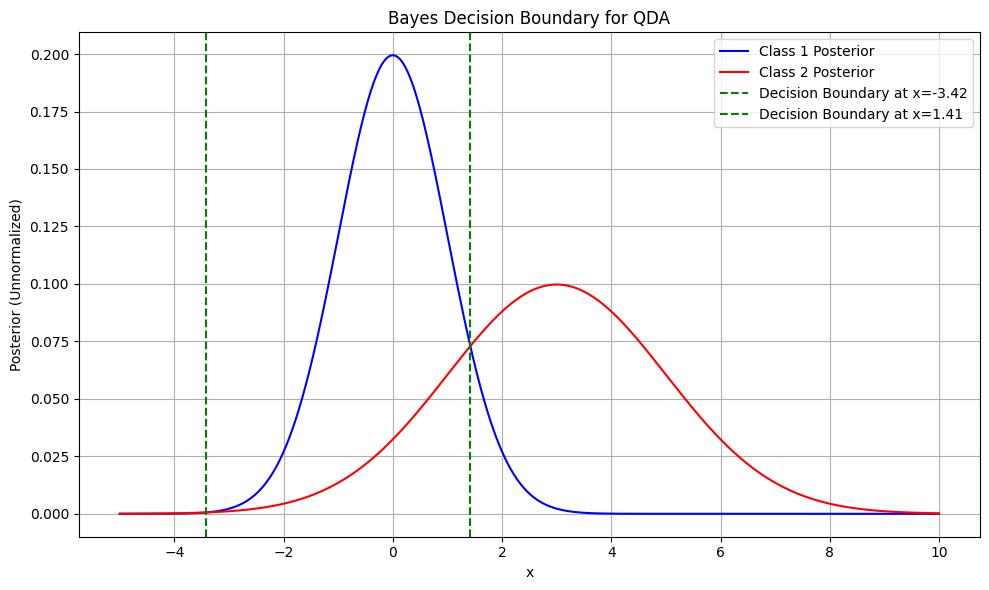

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for two normal distributions (two classes)
mu1, sigma1, pi1 = 0, 1, 0.5
mu2, sigma2, pi2 = 3, 2, 0.5

# Define the range of x
x = np.linspace(-5, 10, 1000)

# Class-conditional densities
f1 = norm.pdf(x, mu1, sigma1)
f2 = norm.pdf(x, mu2, sigma2)

# Posterior (up to proportionality)
posterior1 = pi1 * f1
posterior2 = pi2 * f2

# Bayes classification: choose class with higher posterior
decision = np.where(posterior1 > posterior2, 0, 1)

# Find decision boundary: where the posteriors cross
boundary_indices = np.where(np.diff(decision) != 0)[0]
decision_boundary = x[boundary_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, posterior1, label='Class 1 Posterior', color='blue')
plt.plot(x, posterior2, label='Class 2 Posterior', color='red')
for db in decision_boundary:
    plt.axvline(db, color='green', linestyle='--', label=f'Decision Boundary at x={db:.2f}')
plt.title('Bayes Decision Boundary for QDA')
plt.xlabel('x')
plt.ylabel('Posterior (Unnormalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




### Question 8 

In [ ]:
 Suppose that we take a data set, divide it into equally-sized training
and test sets, and then try out two different classification procedures.
First we use logistic regression and get an error rate of 20 % on the
training data and 30 % on the test data. Next we use 1-nearest neighbors
(i.e. K = 1) and get an average error rate (averaged over both
test and training data sets) of 18 %. Based on these results, which
method should we prefer to use for classification of new observations?
Why?

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=5, n_redundant=0, random_state=42)

# Split into 50% training and 50% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_train_error = zero_one_loss(y_train, log_model.predict(X_train))
log_test_error = zero_one_loss(y_test, log_model.predict(X_test))

# 1-Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_train_error = zero_one_loss(y_train, knn_model.predict(X_train))
knn_test_error = zero_one_loss(y_test, knn_model.predict(X_test))
knn_avg_error = (knn_train_error + knn_test_error) / 2

# Results
{
    "Logistic Regression Train Error": round(log_train_error, 3),
    "Logistic Regression Test Error": round(log_test_error, 3),
    "1-NN Train Error": round(knn_train_error, 3),
    "1-NN Test Error": round(knn_test_error, 3),
    "1-NN Avg Error": round(knn_avg_error, 3)
}


{'Logistic Regression Train Error': 0.148,
 'Logistic Regression Test Error': 0.198,
 '1-NN Train Error': 0.0,
 '1-NN Test Error': 0.112,
 '1-NN Avg Error': 0.056}

### Question 13

This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.
(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?
(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.
(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).
(e) Repeat (d) using LDA.
(f) Repeat (d) using QDA.
(g) Repeat (d) using KNN with K = 1.
(h) Repeat (d) using naive Bayes.
(i) Which of these methods appears to provide the best results on
this data?
(j) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.                                                                                                                             

### Step 0: Load and Explore the Data (parts a, b)

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

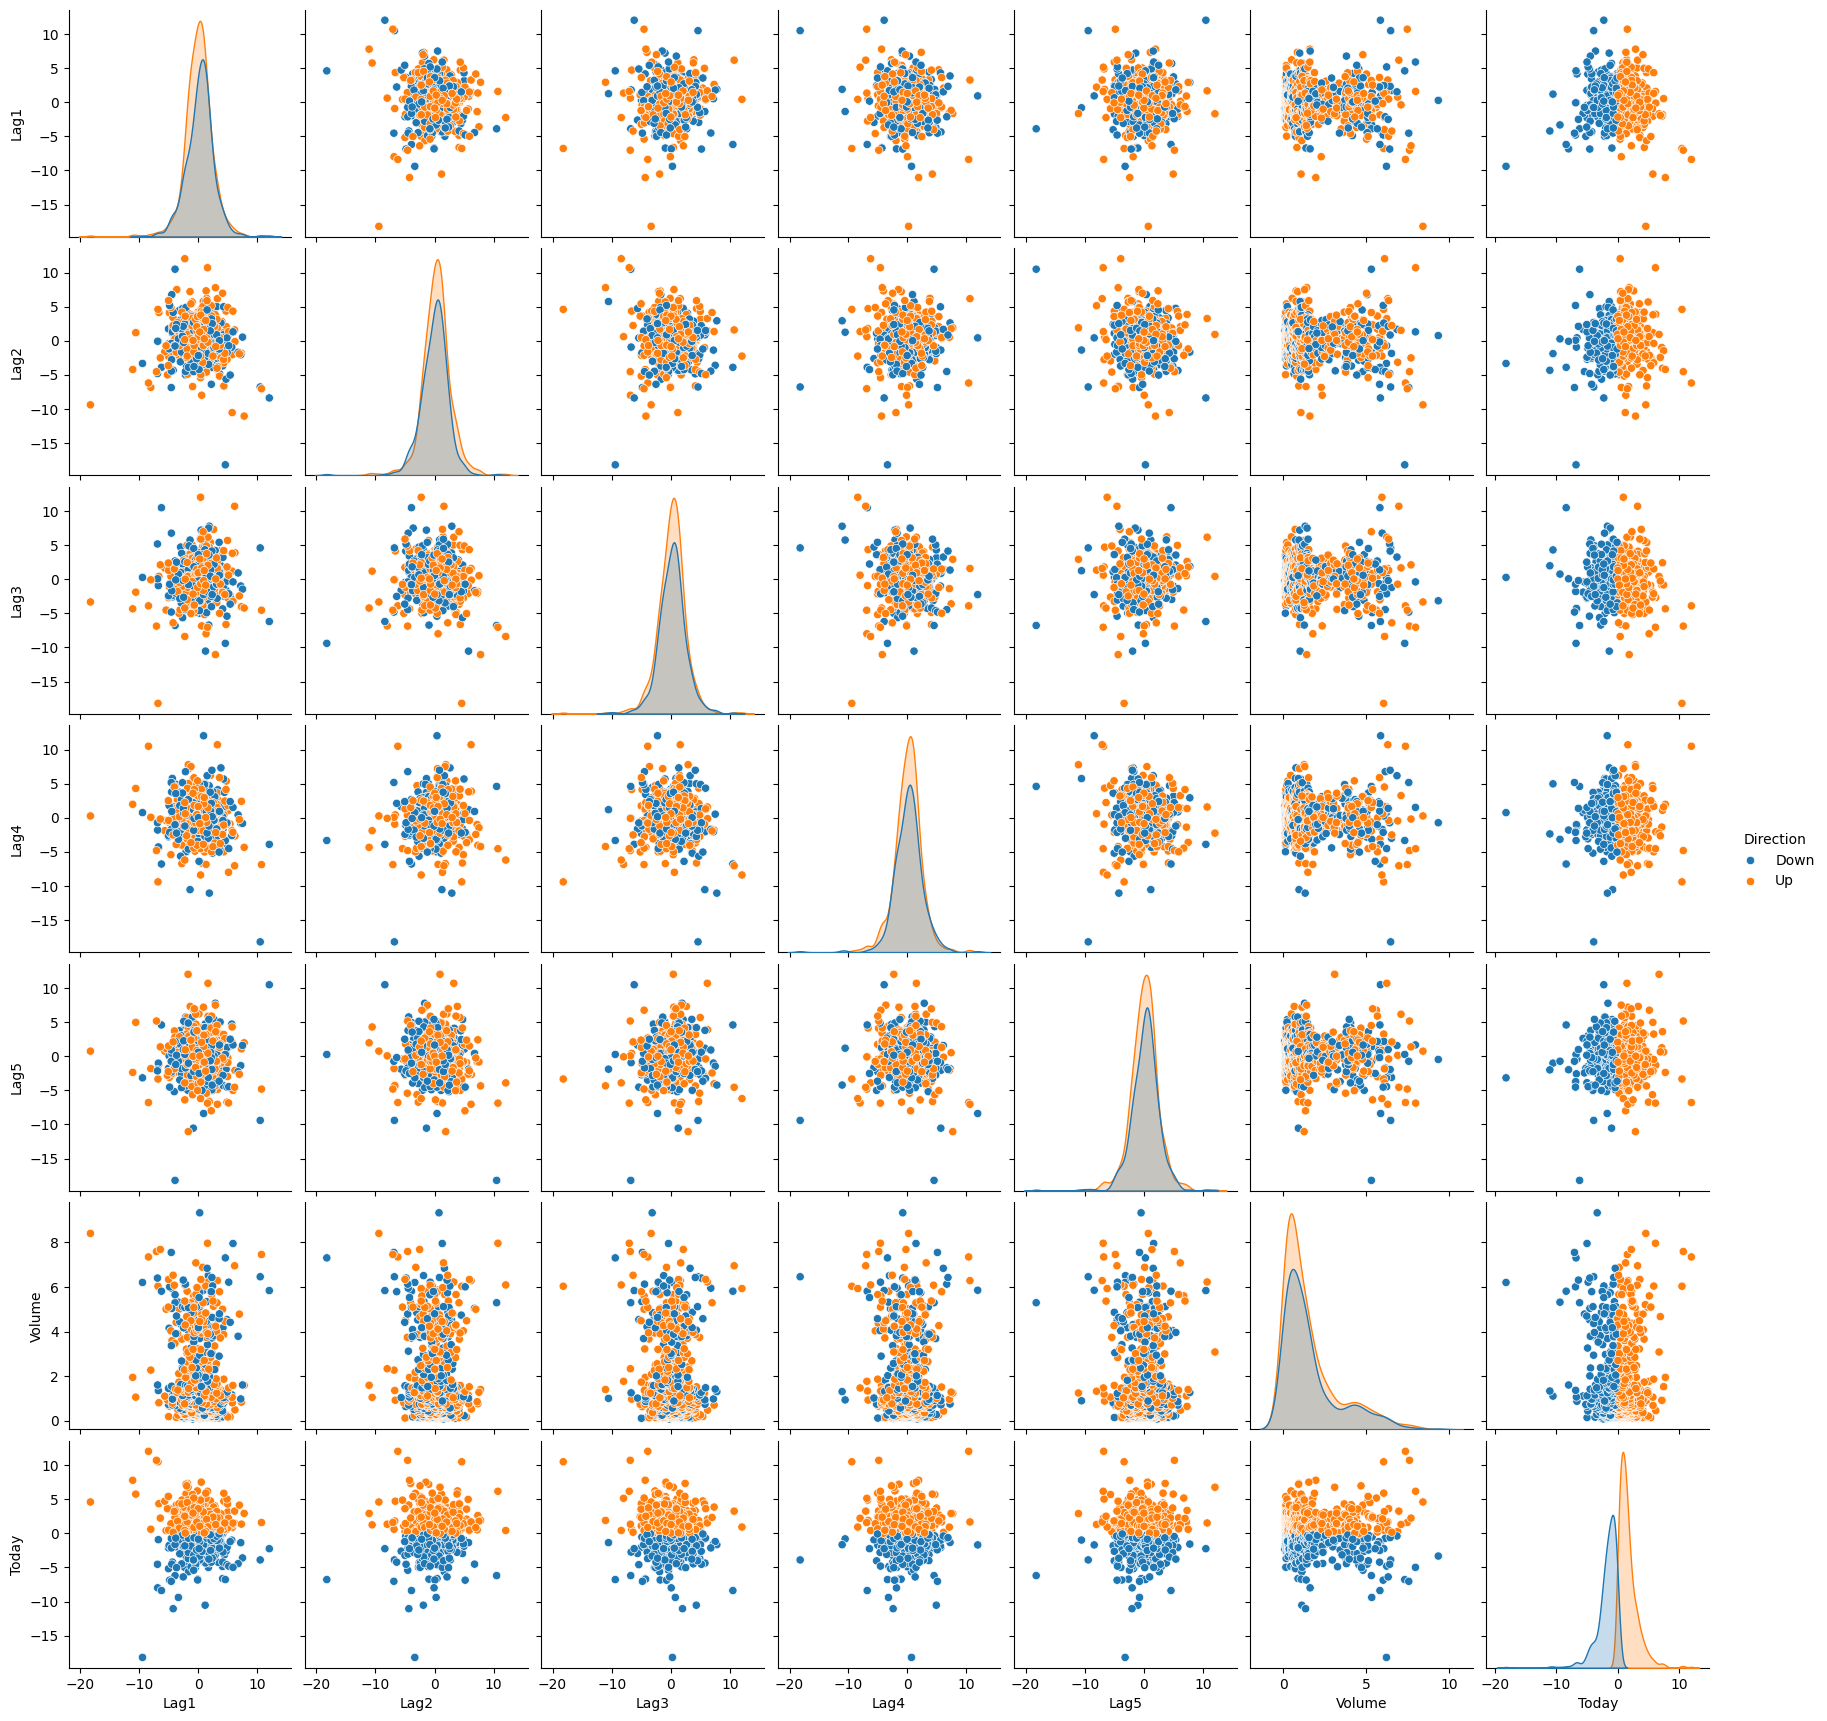

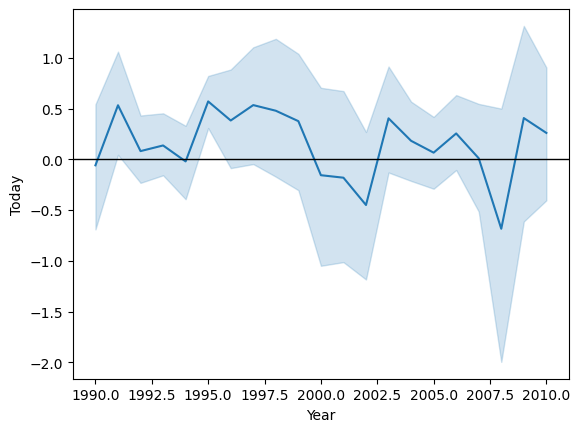

In [4]:
from ISLP import load_data
import pandas as pd

# Load the data
Weekly = load_data('Weekly')
df = pd.DataFrame(Weekly)

# (a) Numerical summaries
print(df.describe())
print(df['Direction'].value_counts())

# (a) Graphical summaries
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume','Today','Direction']], hue='Direction')
plt.show()

sns.lineplot(x='Year', y='Today', data=df)
plt.axhline(0, color='black', lw=1)
plt.show()


### (b) Logistic Regression on Full Data

In [5]:
import statsmodels.api as sm

X = df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
X = sm.add_constant(X)
y = df['Direction'].map({'Down':0, 'Up':1})

logit_full = sm.Logit(y, X).fit(disp=False)
print(logit_full.summary())


                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                0.006580
Time:                        11:46:58   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

###  (c) Confusion Matrix on Full Logistic Fit

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

probs = logit_full.predict(X)
pred = np.where(probs > 0.5, 1, 0)

print(confusion_matrix(y, pred))
print("Accuracy:", accuracy_score(y, pred))


[[ 54 430]
 [ 48 557]]
Accuracy: 0.5610651974288338


### (d) Train/Test Split with Lag2 only

In [7]:
train = df[df['Year'] <= 2008]
test = df[df['Year'] > 2008]

X_train = sm.add_constant(train[['Lag2']])
y_train = train['Direction'].map({'Down':0,'Up':1})
X_test  = sm.add_constant(test[['Lag2']])
y_test  = test['Direction'].map({'Down':0,'Up':1})

model = sm.Logit(y_train, X_train).fit(disp=False)
probs_test = model.predict(X_test)
pred_test = (probs_test > 0.5).astype(int)

print(confusion_matrix(y_test, pred_test))
print("Test Accuracy:", accuracy_score(y_test, pred_test))


[[ 9 34]
 [ 5 56]]
Test Accuracy: 0.625


 ### (e) LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train[['Lag2']], y_train)
pred_lda = lda.predict(X_test[['Lag2']])
print(confusion_matrix(y_test, pred_lda), accuracy_score(y_test, pred_lda))


[[ 9 34]
 [ 5 56]] 0.625


### (f) QDA

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[['Lag2']], y_train)
pred_qda = qda.predict(X_test[['Lag2']])
print(confusion_matrix(y_test, pred_qda), accuracy_score(y_test, pred_qda))


[[ 0 43]
 [ 0 61]] 0.5865384615384616


###  (g) KNN (K=1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train[['Lag2']], y_train)
pred_knn1 = knn1.predict(X_test[['Lag2']])
print(confusion_matrix(y_test, pred_knn1), accuracy_score(y_test, pred_knn1))


[[22 21]
 [31 30]] 0.5


###  (h) Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train[['Lag2']], y_train)
pred_nb = nb.predict(X_test[['Lag2']])
print(confusion_matrix(y_test, pred_nb), accuracy_score(y_test, pred_nb))


[[ 0 43]
 [ 0 61]] 0.5865384615384616
